SARIMA extends ARIMA to handle seasonality. It adds seasonal terms (P, D, Q, s):

P, D, Q: Seasonal AR, I, MA orders

s: Seasonal period (e.g., 12 for monthly data with yearly seasonality)

Equation: ARIMA(p,d,q)(P,D,Q)s



SARIMA is used when your time-series has repeating seasonal patterns (like sales repeating every year or every month). It extends ARIMA by adding seasonal AR, differencing, and MA terms to capture these repeating cycles. It is mainly used for forecasting data that shows clear seasonality, such as monthly sales, temperature, demand, or website traffic.

In [1]:
import statsmodels
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
##SARIMA MODEL WITH Seasonal order (1,1,1,12)

data = pd.Series([112,118,132,129,121,135,148,148,136,119,104,118,
                  115,126,141,135,125,149,170,170,158,133,114,140], 
                 index=pd.date_range(start='2020-01', periods=24, freq='M'))
sarima_model=SARIMAX(data,order=(1,1,1),seasonal_order=(1,1,1,12))
##sarima model that handles both normal pattern and yearly seasonality
##first tupe(1,1,1) models short term trends ,while(1,1,1,12) models pattern that repeat every 12 month 
sarima_fit=sarima_model.fit(disp=False)
##train the model on data and estimate the best parameters to forecast 

print(sarima_fit.summary())

C:\Users\Dharani\AppData\Local\Temp\ipykernel_11628\1719708362.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start='2020-01', periods=24, freq='M'))
c:\Users\Dharani\Downloads\kovai.co\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -33.814
Date:                            Thu, 27 Nov 2025   AIC                             77.627
Time:                                    10:33:55   BIC                             79.617
Sample:                                01-31-2020   HQIC                            76.373
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1922      3.952     -0.049      0.961      -7.938       7.553
ma.L1          0.9935     55.941   

c:\Users\Dharani\Downloads\kovai.co\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA learns these parameters from your data:

1. AR(1) → ar.L1
How the previous month’s value affects the next month.

2. MA(1) → ma.L1
How the previous month’s error affects the next prediction.

3. Seasonal AR(1) → ar.S.L12
How the value 12 months back (same month last year) affects the next month.

4. Seasonal MA(1) → ma.S.L12
How the error 12 months back affects the next prediction.

5. sigma²
The variance of the random noise in the data.

In [2]:
##Forecast next 12 months
sarima_forecast=sarima_fit.get_forecast(steps=12)
sarima_forecast_df=sarima_forecast.conf_int()
print(sarima_forecast.predicted_mean)

2022-01-31    140.963161
2022-02-28    146.986553
2022-03-31    160.999977
2022-04-30    157.971729
2022-05-31    149.953605
2022-06-30    164.044986
2022-07-31    177.118116
2022-08-31    177.118119
2022-09-30    165.118099
2022-10-31    148.045115
2022-11-30    133.007827
2022-12-31    147.121298
Freq: ME, Name: predicted_mean, dtype: float64


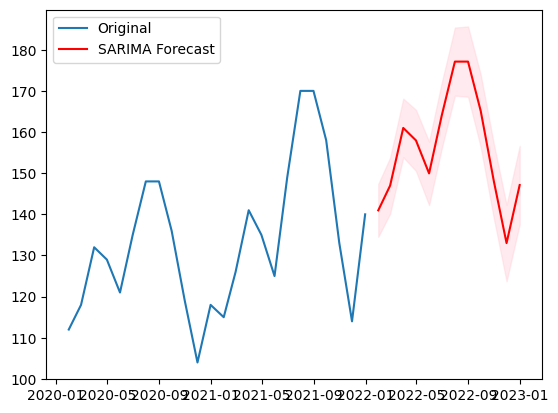

In [3]:
##plot forecast 
import matplotlib.pyplot as plt
plt.plot(data,label='Original')
plt.plot(sarima_forecast.predicted_mean,label='SARIMA Forecast',color='red')
plt.fill_between(sarima_forecast_df.index,
                 sarima_forecast_df.iloc[:,0],
                 sarima_forecast_df.iloc[:,1],color='pink',alpha=0.3)
plt.legend()
plt.show()